In [1]:
"""
细胞迁移数据处理与分析
功能：读取细胞轨迹数据，进行坐标归一化和数据整理
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols
from scipy import stats

# ===== 全局配置 =====
CONFIG = {
    'bar': 1.243,
    'interval': 30,
    'resolution': 1024,
    'frame': 30,
    'data_path': r'G:\我的坚果云\My Projects\刘妍-微通道\Fig.2 and related Figs\B-细胞迁移速度表征\MM231 cells\0525_velo_d221116.xlsx'
}

# 符号变量和计算参数
x = symbols('x')
k = CONFIG['bar'] * 60 / CONFIG['interval']


def load_and_clean_data(file_path):
    """
    读取并清洗细胞数据

    参数:
        file_path: Excel文件路径

    返回:
        清洗后的DataFrame
    """
    # 读取Excel数据
    cell_data = pd.read_excel(file_path, sheet_name='Sheet1')

    # 删除全空的行和列
    cell_data = cell_data.dropna(axis=0, how='all')
    cell_data = cell_data.dropna(axis=1, how='all')

    # 重置索引
    cell_data.reset_index(inplace=True, drop=True)

    # 选择需要的列
    required_columns = ['Distance', 'period', 'X', 'Y', 'Slice n°', 'cell ID']
    cell_data = cell_data[required_columns]

    return cell_data


def normalize_coordinates(cell_data):
    """
    将坐标归一化为相对于起始位置的坐标

    参数:
        cell_data: 原始细胞数据DataFrame

    返回:
        添加了n_X和n_Y列的DataFrame
    """
    # 找到每个细胞的起始位置（Distance == -1 标记细胞起始）
    cell_start_indices = list(cell_data.index[cell_data['Distance'] == -1])
    cell_start_indices.append(len(cell_data))  # 添加结束位置

    # 初始化归一化坐标列
    cell_data['n_X'] = 0.0
    cell_data['n_Y'] = 0.0

    # 对每个细胞进行坐标归一化
    for j in range(len(cell_start_indices) - 1):
        start_idx = cell_start_indices[j]
        end_idx = cell_start_indices[j + 1]

        # 获取该细胞的起始坐标
        origin_x = cell_data.loc[start_idx, 'X']
        origin_y = cell_data.loc[start_idx, 'Y']

        # 使用向量化操作批量计算归一化坐标
        idx_range = slice(start_idx, end_idx)
        cell_data.loc[idx_range, 'n_X'] = cell_data.loc[idx_range, 'X'] - origin_x
        cell_data.loc[idx_range, 'n_Y'] = cell_data.loc[idx_range, 'Y'] - origin_y

    return cell_data


def modify_period_groups(cell_data, old_period=100, new_period=150):
    """
    修改指定period的分组（可选功能）

    参数:
        cell_data: 细胞数据DataFrame
        old_period: 原period值
        new_period: 新period值

    返回:
        修改后的DataFrame
    """
    cell_data.loc[cell_data['period'] == old_period, 'period'] = new_period
    return cell_data


def sort_data(cell_data):
    """
    按照period、cell ID、Slice n°排序

    参数:
        cell_data: 细胞数据DataFrame

    返回:
        排序后的DataFrame
    """
    sorted_data = cell_data.sort_values(
        by=['period', 'cell ID', 'Slice n°'],
        ascending=True
    )
    sorted_data.reset_index(inplace=True, drop=True)

    return sorted_data


def main():
    """主函数"""
    print("=" * 50)
    print("开始处理细胞迁移数据...")
    print("=" * 50)

    # 1. 读取和清洗数据
    print("\n[1/4] 读取数据...")
    cell_data = load_and_clean_data(CONFIG['data_path'])
    print(f"    数据读取完成，共 {len(cell_data)} 行")

    # 2. 坐标归一化
    print("\n[2/4] 坐标归一化处理...")
    cell_data = normalize_coordinates(cell_data)
    print("    坐标归一化完成")

    # 3. 数据排序
    print("\n[3/4] 数据排序...")
    temp_pd = sort_data(cell_data)
    print("    排序完成")

    # 4. 可选：修改分组（如需要，取消注释）
    print("\n[4/4] 数据整理...")
    # temp_pd = modify_period_groups(temp_pd, old_period=100, new_period=150)

    # 保存处理结果
    cell_len = temp_pd.copy()

    # 显示结果
    print("\n" + "=" * 50)
    print("数据处理完成！")
    print("=" * 50)
    print("\n处理后的数据预览：")
    print(temp_pd.head(10))
    print(f"\n数据形状: {temp_pd.shape}")
    print(f"包含细胞数: {temp_pd['cell ID'].nunique()}")
    print(f"Period分组: {sorted(temp_pd['period'].unique())}")

    return temp_pd, cell_len

# ===== 程序入口 =====
if __name__ == '__main__':
    temp_pd, cell_len = main()
    print('\n程序执行完毕！')


开始处理细胞迁移数据...

[1/4] 读取数据...
    数据读取完成，共 885 行

[2/4] 坐标归一化处理...
    坐标归一化完成

[3/4] 数据排序...
    排序完成

[4/4] 数据整理...

数据处理完成！

处理后的数据预览：
   Distance  period    X    Y  Slice n°  cell ID  n_X   n_Y
0    -1.000      50  183  720         1        8  0.0   0.0
1     0.658      50  184  715         2        8  1.0  -5.0
2     0.532      50  180  714         3        8 -3.0  -6.0
3     0.516      50  180  710         4        8 -3.0 -10.0
4     0.903      50  180  703         5        8 -3.0 -17.0
5     0.408      50  179  700         6        8 -4.0 -20.0
6     0.658      50  178  695         7        8 -5.0 -25.0
7     0.826      50  174  690         8        8 -9.0 -30.0
8     0.129      50  174  689         9        8 -9.0 -31.0
9     0.752      50  177  694        10        8 -6.0 -26.0

数据形状: (885, 8)
包含细胞数: 55
Period分组: [np.int64(50), np.int64(100), np.int64(150), np.int64(200)]

程序执行完毕！


开始绘制细胞迁移轨迹（含主次刻度）...
找到 4 个period分组: [ 50 100 150 200]
边界索引: [-1, 312, 653, 817, 884]

[1/4] 绘制 period = 50 的轨迹...
    包含 19 个细胞


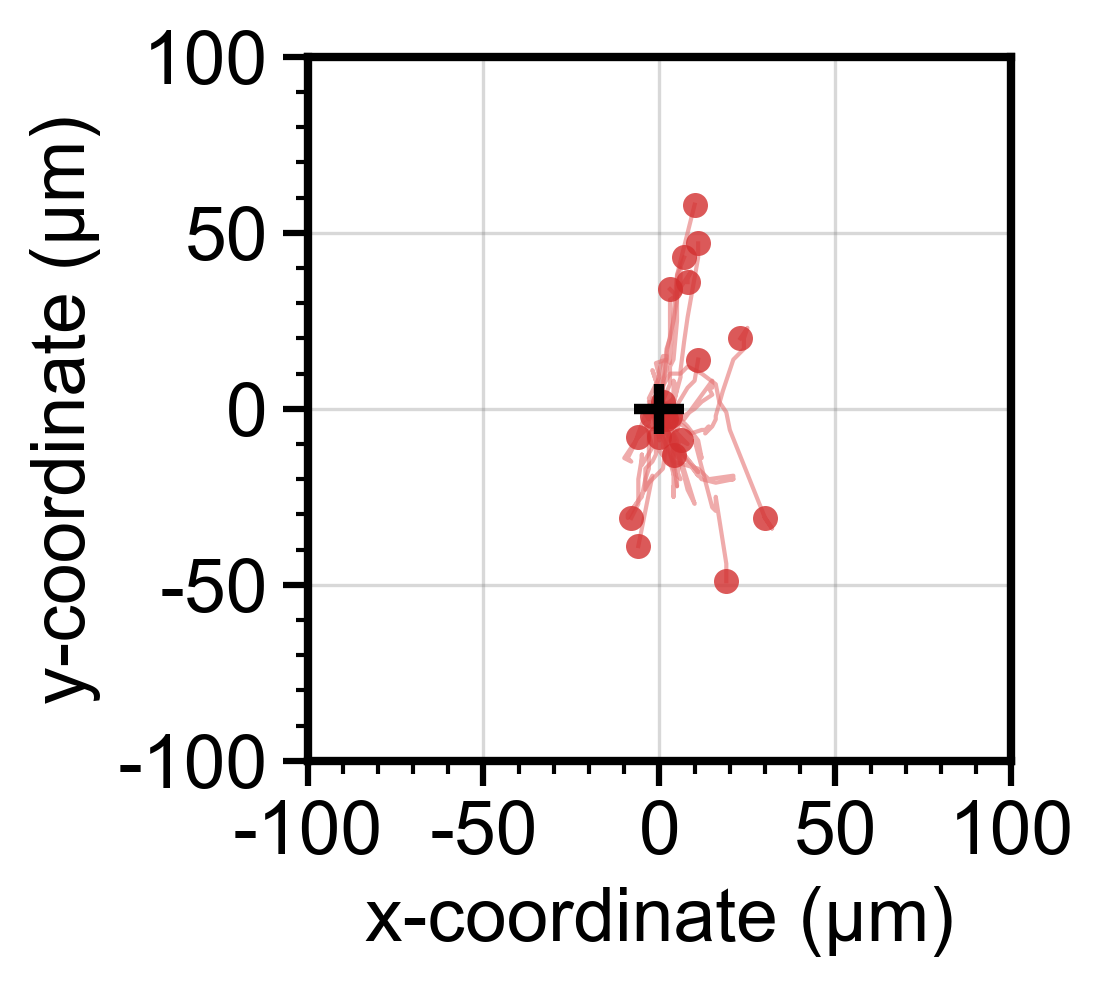

[2/4] 绘制 period = 100 的轨迹...
    包含 22 个细胞


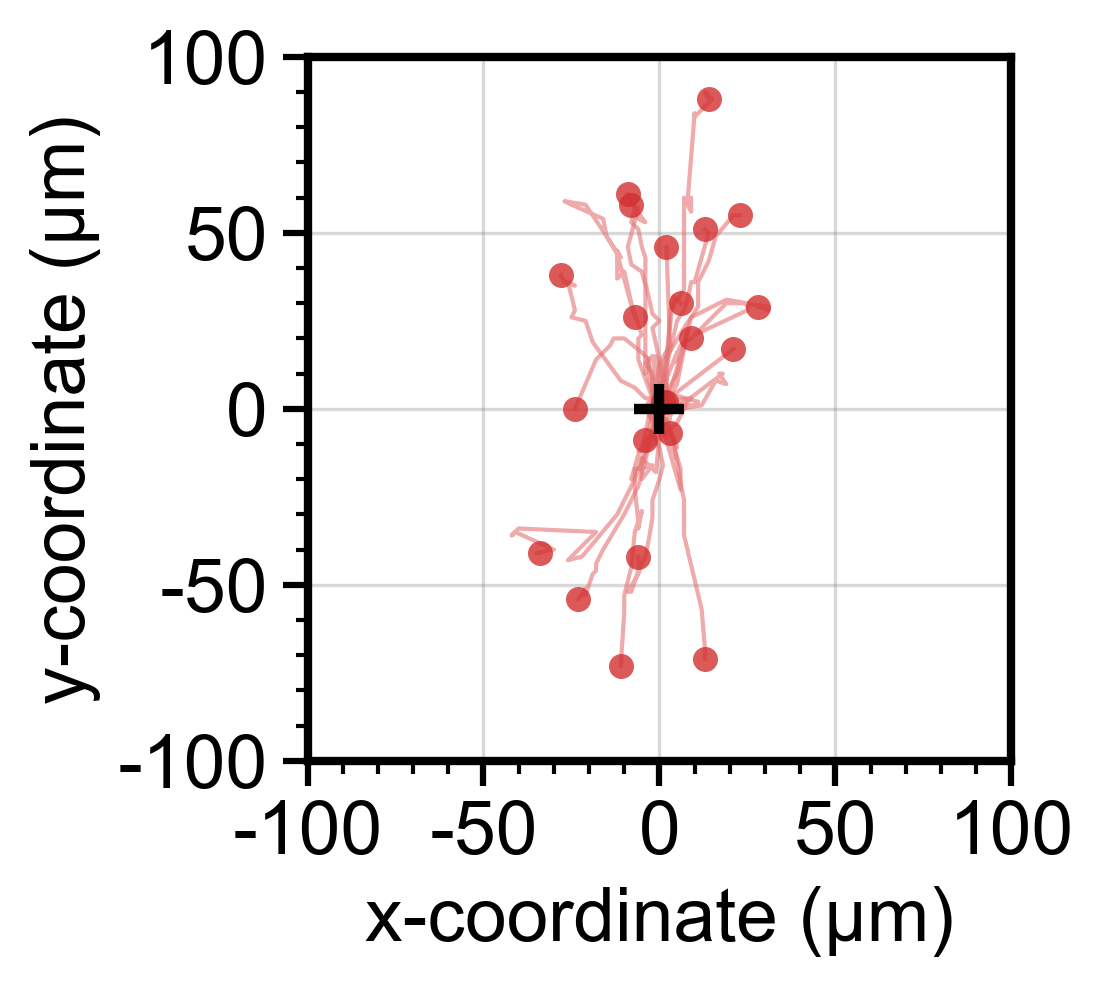

[3/4] 绘制 period = 150 的轨迹...
    包含 10 个细胞


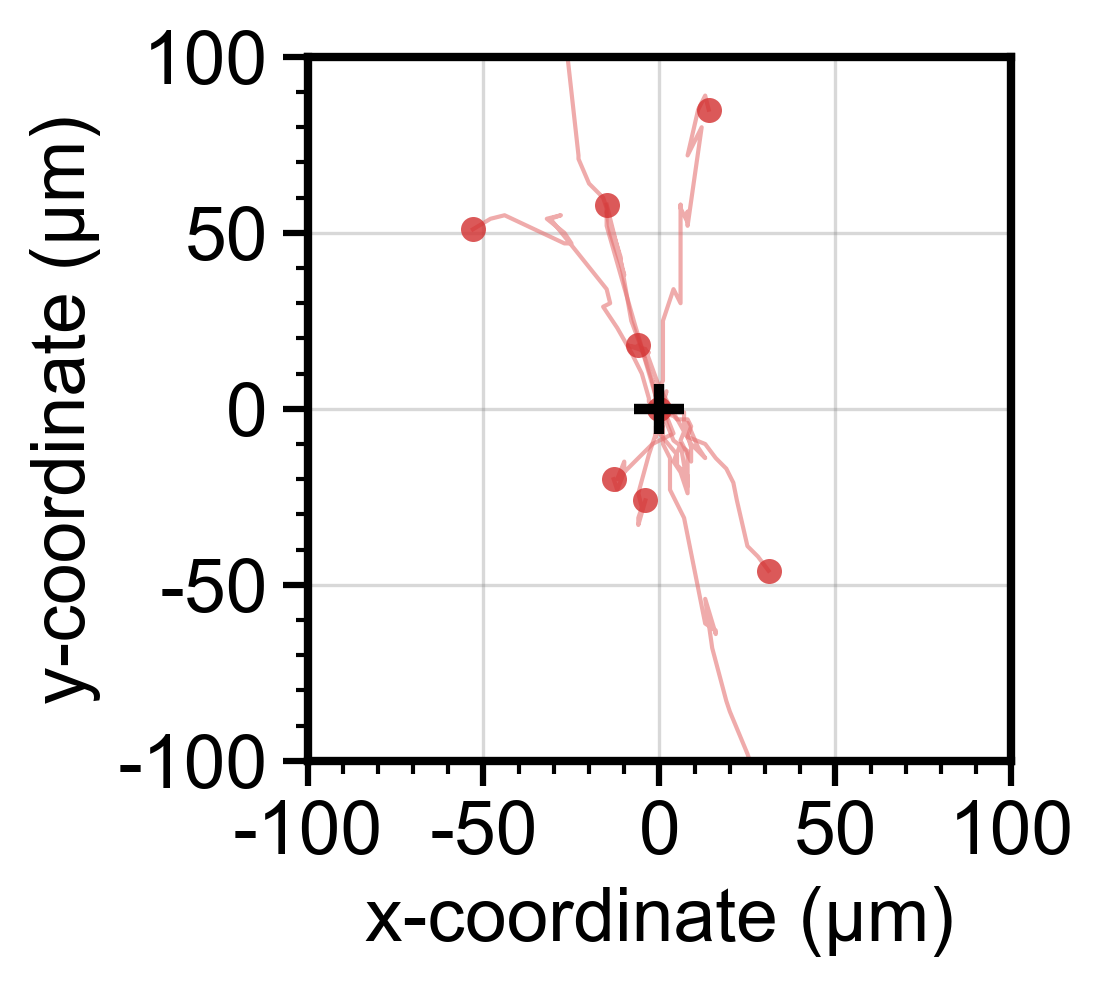

[4/4] 绘制 period = 200 的轨迹...
    包含 4 个细胞


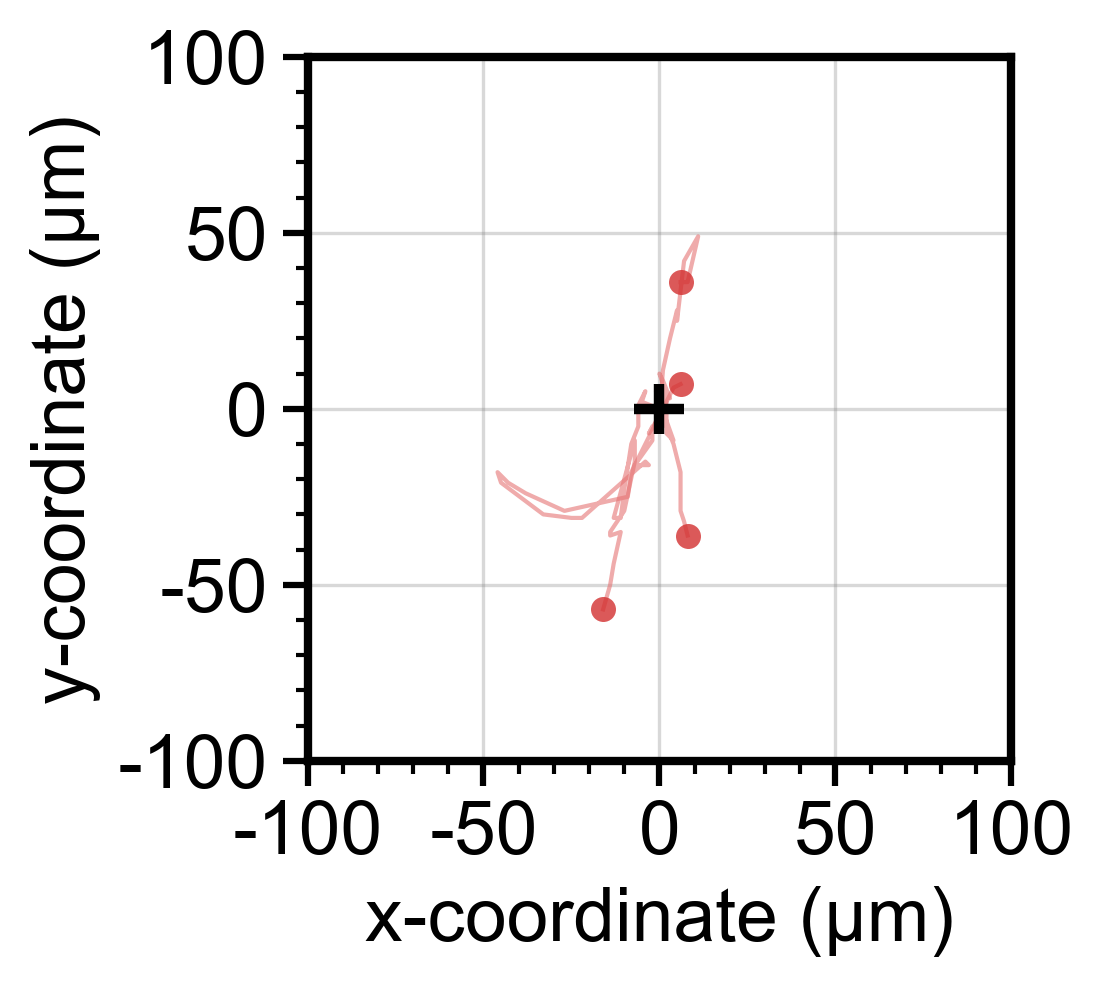


所有轨迹绘制完成！

程序执行完毕！


In [7]:
"""
细胞迁移轨迹可视化（匹配参考图片风格 - 含主次刻度）
"""

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

# ===== 绘图配置 =====
PLOT_CONFIG = {
    'figure_size': (4, 4),
    'dpi': 300,
    'font_size': 18,
    'font_family': 'Arial',
    'trajectory_color': '#E57373',
    'trajectory_alpha': 0.6,
    'line_width': 1.0,
    'marker_size': 6,
    'marker_color': '#D32F2F',
    'border_width': 2,
    'major_tick_width': 1.5,
    'major_tick_length': 6,
    'minor_tick_width': 1.0,
    'minor_tick_length': 3,
    'x_limit': (-100, 100),
    'y_limit': (-100, 100),
    'major_tick_interval': 50,  # 主刻度间隔
    'minor_tick_interval': 10,   # 次刻度间隔
    'grid_alpha': 0.3,
    'center_marker_size': 12
}

# Period标签映射
PERIOD_LABELS = {
    50: 'small λ',
    100: 'large λ'
}


def get_period_boundaries(cell_len):
    """获取每个period在数据中的边界索引"""
    boundaries = [-1]

    for i in range(len(cell_len) - 1):
        if cell_len.loc[i, 'period'] != cell_len.loc[i + 1, 'period']:
            boundaries.append(i)

    boundaries.append(len(cell_len) - 1)

    return boundaries


def extract_cell_trajectories(data):
    """从数据中提取每个细胞的轨迹"""
    cell_trajectories = {}

    for cell_id in data['cell ID'].unique():
        trajectory = data.loc[data['cell ID'] == cell_id, ['n_X', 'n_Y']].values
        cell_trajectories[cell_id] = trajectory

    return cell_trajectories


def setup_plot_style():
    """配置全局绘图样式"""
    plt.rcParams['font.size'] = PLOT_CONFIG['font_size']
    plt.rcParams['font.family'] = PLOT_CONFIG['font_family']
    plt.rcParams['axes.linewidth'] = PLOT_CONFIG['border_width']


def create_trajectory_plot(ax, cell_trajectories, period_value):
    """在指定的轴上绘制细胞轨迹"""
    # 设置背景网格
    ax.grid(True, linestyle='-', linewidth=0.8,
            color='gray', alpha=PLOT_CONFIG['grid_alpha'], zorder=0)

    # 绘制所有细胞轨迹
    for cell_id, trajectory in cell_trajectories.items():
        # 绘制轨迹线
        ax.plot(trajectory[:, 0], trajectory[:, 1],
                color=PLOT_CONFIG['trajectory_color'],
                linewidth=PLOT_CONFIG['line_width'],
                alpha=PLOT_CONFIG['trajectory_alpha'],
                zorder=2)

        # 在轨迹终点添加标记点
        ax.plot(trajectory[-1, 0], trajectory[-1, 1],
                'o',
                color=PLOT_CONFIG['marker_color'],
                markersize=PLOT_CONFIG['marker_size'],
                markeredgewidth=0,
                alpha=0.8,
                zorder=3)

    # 在原点绘制十字标记
    ax.plot(0, 0, '+',
            color='black',
            markersize=PLOT_CONFIG['center_marker_size'],
            markeredgewidth=2.5,
            zorder=4)

    # 设置坐标轴范围
    ax.set_xlim(PLOT_CONFIG['x_limit'])
    ax.set_ylim(PLOT_CONFIG['y_limit'])

    # 设置轴标签
    ax.set_xlabel('x-coordinate (μm)', fontsize=PLOT_CONFIG['font_size'])
    ax.set_ylabel('y-coordinate (μm)', fontsize=PLOT_CONFIG['font_size'])


def configure_plot_appearance(ax):
    """配置图表外观（边框、主次刻度等）"""
    # 设置边框宽度
    for spine in ax.spines.values():
        spine.set_linewidth(PLOT_CONFIG['border_width'])
        spine.set_color('black')

    # ===== 主刻度设置 =====
    # 设置主刻度间隔
    major_interval = PLOT_CONFIG['major_tick_interval']
    ax.xaxis.set_major_locator(MultipleLocator(major_interval))
    ax.yaxis.set_major_locator(MultipleLocator(major_interval))

    # 设置主刻度参数（有标签）
    ax.tick_params(
        axis='both',
        which='major',  # 指定为主刻度
        width=PLOT_CONFIG['major_tick_width'],
        length=PLOT_CONFIG['major_tick_length'],
        labelsize=PLOT_CONFIG['font_size'],
        direction='out'
    )

    # ===== 次刻度设置 =====
    # 设置次刻度间隔
    minor_interval = PLOT_CONFIG['minor_tick_interval']
    ax.xaxis.set_minor_locator(MultipleLocator(minor_interval))
    ax.yaxis.set_minor_locator(MultipleLocator(minor_interval))

    # 设置次刻度参数（无标签）
    ax.tick_params(
        axis='both',
        which='minor',  # 指定为次刻度
        width=PLOT_CONFIG['minor_tick_width'],
        length=PLOT_CONFIG['minor_tick_length'],
        direction='out',
        labelsize=0  # 次刻度不显示标签
    )

    # 设置刻度格式（主刻度）
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x)}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: f'{int(y)}'))

    # 确保坐标轴比例相等（正方形图）
    ax.set_aspect('equal', adjustable='box')


def plot_trajectories_by_period(cell_len, save_figures=False):
    """
    按period分组绘制细胞迁移轨迹

    参数:
        cell_len: 包含所有细胞数据的DataFrame
        save_figures: 是否保存图片
    """
    # 设置绘图样式
    setup_plot_style()

    # 获取period边界和唯一值
    boundaries = get_period_boundaries(cell_len)
    periods = cell_len['period'].unique()

    print(f"找到 {len(periods)} 个period分组: {periods}")
    print(f"边界索引: {boundaries}\n")

    # 为每个period绘制轨迹图
    for idx, period_value in enumerate(periods):
        print(f"[{idx + 1}/{len(periods)}] 绘制 period = {period_value} 的轨迹...")

        # 提取当前period的数据
        low, up = boundaries[idx] + 1, boundaries[idx + 1] + 1
        period_data = cell_len.iloc[low:up].copy()
        period_data.reset_index(drop=True, inplace=True)

        # 提取细胞轨迹
        cell_trajectories = extract_cell_trajectories(period_data)
        print(f"    包含 {len(cell_trajectories)} 个细胞")

        # 创建图表
        fig, ax = plt.subplots(
            figsize=PLOT_CONFIG['figure_size'],
            dpi=PLOT_CONFIG['dpi']
        )

        # 绘制轨迹
        create_trajectory_plot(ax, cell_trajectories, period_value)

        # 配置外观（包括主次刻度）
        configure_plot_appearance(ax)

        # 调整布局
        plt.tight_layout()

        # 保存图表（如果需要）
        if save_figures:
            filename = f'cell_tracks_period_{int(period_value)}.png'
            fig.savefig(filename,
                       bbox_inches='tight',
                       dpi=PLOT_CONFIG['dpi'],
                       facecolor='white',
                       edgecolor='none')
            print(f"    已保存: {filename}")

        # 显示图表
        plt.show()

        plt.close(fig)

    print("\n所有轨迹绘制完成！")


def main(cell_len, save_figures=False):
    """
    主函数

    参数:
        cell_len: 处理好的细胞数据DataFrame
        save_figures: 是否保存图片到文件
    """
    print("=" * 60)
    print("开始绘制细胞迁移轨迹（含主次刻度）...")
    print("=" * 60)

    plot_trajectories_by_period(cell_len, save_figures)

    print("\n程序执行完毕！")


# ===== 程序入口 =====
if __name__ == '__main__':
    # 假设 cell_len 已经从前面的代码中生成
    # cell_len = ... (来自前面的数据处理代码)

    # 运行主程序
    main(cell_len, save_figures=False)
